In [150]:
import pandas as pd
import numpy as np

In [151]:
df=pd.read_csv(r"D:\datasets\spam_ham_dataset.CSV")

In [152]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [153]:
df.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [154]:
df.drop("Unnamed: 0", axis=1,inplace=True)

In [155]:
df.shape

(5171, 3)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [157]:
df.describe()

,label_num
count,5171.000000
mean,0.289886
std,0.453753
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [158]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier as dtf
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
import pickle
from sklearn import svm

In [159]:
df.isnull().any()

label        False
text         False
label_num    False
dtype: bool

In [160]:
df.isnull().sum()

label        0
text         0
label_num    0
dtype: int64

(array([3672.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1499.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

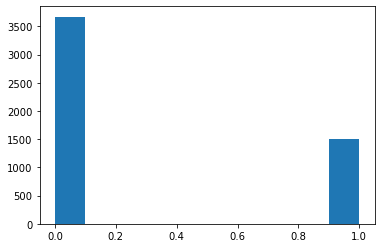

In [161]:
plt.hist(df['label_num'])

In [162]:
import re

In [163]:
l=[]

In [164]:
regex = "[^A-Za-z0-9\s]"
stemmer = PorterStemmer()
for i in range(len(df)):
    a=re.sub(regex, "", df.loc[i]['text'])
    a=a.lower()
    l2=a.split(" ")
    l3=[]
    for i in l2:
        l3.append(stemmer.stem(i))
    l.append(' '.join(l3))

In [165]:
vectorizer = CountVectorizer(max_features=35000)


In [166]:
X = vectorizer.fit(l)

In [167]:
pickle.dump(X,open('vectorizer.pkl', 'wb'))

In [168]:
X=X.transform(l)

In [169]:
X=X.toarray()

In [170]:
df1=pd.DataFrame(X)

In [171]:
y=df['label_num']

In [172]:
X_train, X_test, y_train, y_test=train_test_split(
...     df1, y, test_size=0.33, random_state=42)

In [173]:
print(X_train.shape)
print(X_test.shape)

(3464, 35000)
(1707, 35000)


In [174]:
print(y_train.shape)
print(y_test.shape)

(3464,)
(1707,)


In [175]:
n=MultinomialNB()

In [176]:
n.fit(X_train,y_train)

MultinomialNB()

In [177]:
b=n.predict(X_test)

In [178]:
accuracy_score(y_test, b)

0.9771528998242531

In [179]:
pickle.dump(n, open('naive.pkl', 'wb'))

In [168]:
decision=dtf()

In [169]:
decision.fit(X_train,y_train)

DecisionTreeClassifier()

In [170]:
decpred=decision.predict(X_test)

In [171]:
accuracy_score(y_test, decpred)

0.9361452841241945

In [178]:
pickle.dump(decision, open('decision.pkl', 'wb'))

In [172]:
S=svm.SVC(kernel='linear', random_state=0)

In [173]:
S.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [174]:
svmpred=decision.predict(X_test)

In [176]:
accuracy_score(y_test, svmpred)

0.9361452841241945

In [179]:
pickle.dump(S, open('svm.pkl', 'wb'))

In [25]:
q="""Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes ."""